In [2]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
TRAIN_DIR = 'test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 1000/1000 [00:01<00:00, 536.53it/s]

10000


In [13]:
random.shuffle(TRAIN_DATA)

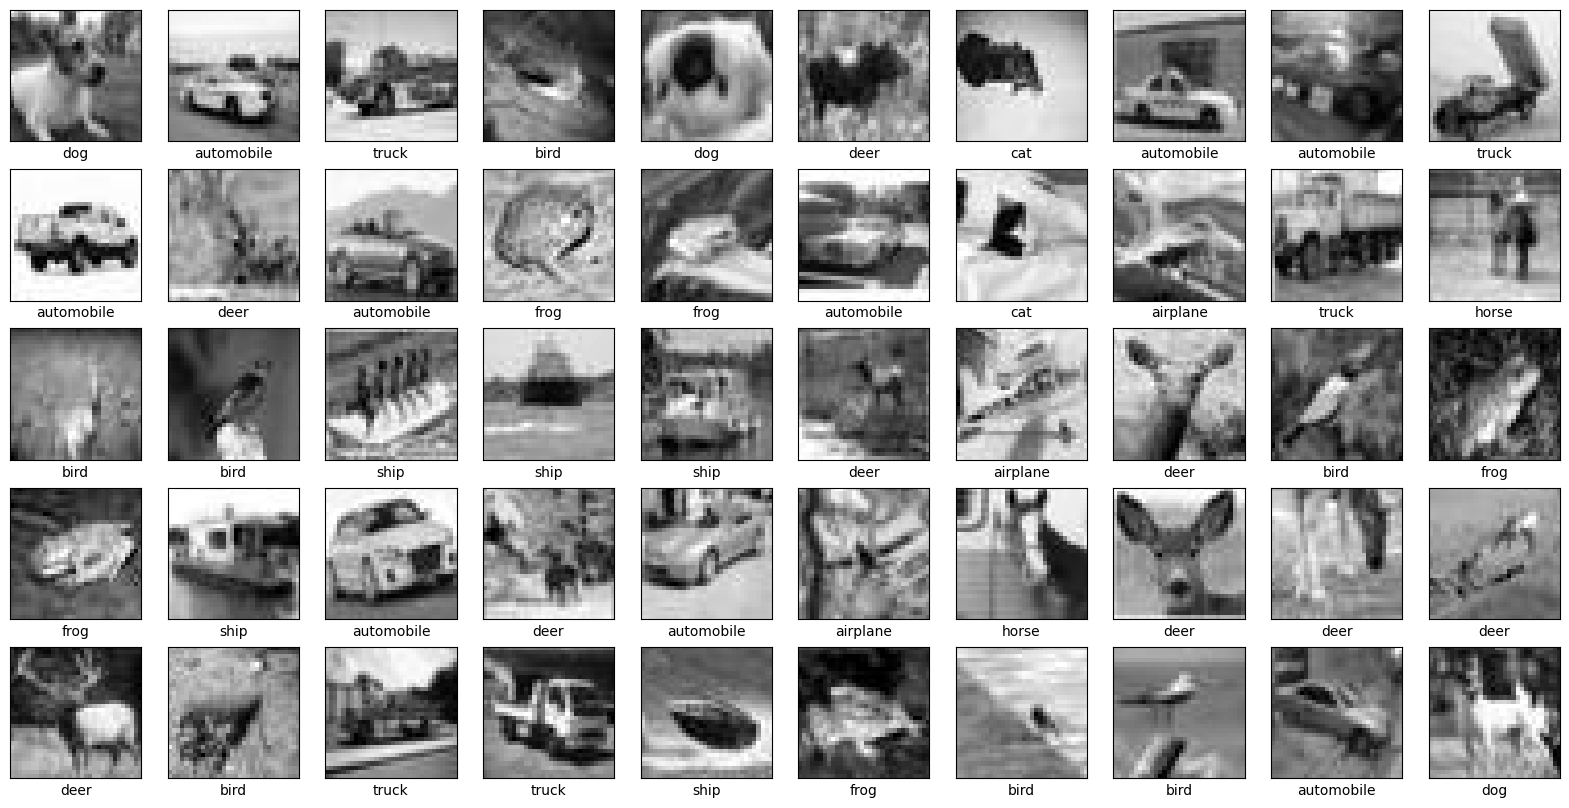

In [7]:
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0], cmap='gray')
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [15]:
f0 = TRAIN_DATA[:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [16]:
def plot_Accuracies(fold,k_choices,accuracies):
    best = [0,0]
    for k in k_choices:
        accu = accuracies[k]
        if best[1]< max(accu):
            best[0]=k
            best[1]=max(accu)
        plt.scatter([k] * len(accu), accu)

    # plot the trend line with error bars that correspond to standard deviation

    accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
    accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title(f"Cross-validation   fold={fold}   K={best[0]}   Accuracy = {best[1]}")
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

In [21]:
k_values = [1, 3, 5, 7, 9]

In [22]:
k_values_error_l1 = {}
k_values_error_l2 = {}
for k in k_values:
    k_values_error_l1[k]=[]
    k_values_error_l2[k]=[]

In [23]:

midpoint_l1_accuracies = []
midpoint_l2_accuracies = []

for i in range(5):
    if i==0:
        train = f1+f2+f3+f4
        validation = f0
    elif i==1:
        train = f0+f2+f3+f4
        validation = f1
    elif i==2:
        train = f0+f1+f3+f4
        validation = f2
    elif i==3:
        train = f0+f1+f2+f4
        validation = f3
    elif i==4:
        train = f0+f1+f2+f3
        validation = f4

    l1_accuracies = []
    l2_accuracies = []
    for k in k_values:
        l1_correct = 0
        l2_correct = 0
        total = 0
        for v in tqdm(validation):
            v_img = v[0]
            v_label = v[1]
            l1_scores = []
            l2_scores = []
            for t in train:
                t_img = t[0]
                t_label = t[1]
                # L1 distance
                l1_dist = np.sum(np.abs(t_img - v_img))
                l1_scores.append((l1_dist, t_label))
                # L2 distance
                l2_dist = np.sqrt(np.sum((t_img - v_img) ** 2))
                l2_scores.append((l2_dist, t_label))
            sorted_l1_scores = sorted(l1_scores, key=lambda x: x[0])[:k]
            l1_neighbors = [s[1] for s in sorted_l1_scores]
            l1_prediction = max(set(l1_neighbors), key=l1_neighbors.count)

            sorted_l2_scores = sorted(l2_scores, key=lambda x: x[0])[:k]
            l2_neighbors = [s[1] for s in sorted_l2_scores]
            l2_prediction = max(set(l2_neighbors), key=l2_neighbors.count)
            if l1_prediction == v_label:
                l1_correct += 1
            if l2_prediction == v_label:
                l2_correct += 1

            total += 1

        l1_accuracy = l1_correct / total
        l1_accuracies.append(l1_accuracy)
        k_values_error_l1[k].append(l1_accuracy)

        l2_accuracy = l2_correct / total
        l2_accuracies.append(l2_accuracy)
        k_values_error_l2[k].append(l2_accuracy)

        print("Fold {}, k = {}, L1 accuracy = {:.2f}%, L2 accuracy = {:.2f}%".format(i, k, l1_accuracy * 100, l2_accuracy * 100))

    min_l1_accuracy = min(l1_accuracies)
    max_l1_accuracy = max(l1_accuracies)
    midpoint_l1_accuracy = (min_l1_accuracy + max_l1_accuracy) / 2
    midpoint_l1_accuracies.append(midpoint_l1_accuracy)

    min_l2_accuracy = min(l2_accuracies)
    max_l2_accuracy = max(l2_accuracies)
    midpoint_l2_accuracy = (min_l2_accuracy + max_l2_accuracy) / 2
    midpoint_l2_accuracies.append(midpoint_l2_accuracy)

100%|██████████| 1000/1000 [00:38<00:00, 26.22it/s]


Fold 0, k = 1, L1 accuracy = 18.40%, L2 accuracy = 14.50%


100%|██████████| 1000/1000 [00:38<00:00, 26.08it/s]


Fold 0, k = 3, L1 accuracy = 17.30%, L2 accuracy = 13.50%


100%|██████████| 1000/1000 [00:38<00:00, 25.89it/s]


Fold 0, k = 5, L1 accuracy = 17.20%, L2 accuracy = 13.70%


100%|██████████| 1000/1000 [00:38<00:00, 25.87it/s]


Fold 0, k = 7, L1 accuracy = 15.90%, L2 accuracy = 13.30%


100%|██████████| 1000/1000 [00:38<00:00, 26.00it/s]


Fold 0, k = 9, L1 accuracy = 15.80%, L2 accuracy = 14.00%


100%|██████████| 1000/1000 [00:38<00:00, 25.83it/s]


Fold 1, k = 1, L1 accuracy = 14.90%, L2 accuracy = 16.70%


100%|██████████| 1000/1000 [00:38<00:00, 25.88it/s]


Fold 1, k = 3, L1 accuracy = 12.80%, L2 accuracy = 14.10%


100%|██████████| 1000/1000 [00:38<00:00, 25.95it/s]


Fold 1, k = 5, L1 accuracy = 14.00%, L2 accuracy = 14.60%


100%|██████████| 1000/1000 [00:38<00:00, 25.86it/s]


Fold 1, k = 7, L1 accuracy = 14.90%, L2 accuracy = 14.70%


100%|██████████| 1000/1000 [00:38<00:00, 26.28it/s]


Fold 1, k = 9, L1 accuracy = 14.90%, L2 accuracy = 14.10%


100%|██████████| 1000/1000 [00:37<00:00, 26.44it/s]


Fold 2, k = 1, L1 accuracy = 16.70%, L2 accuracy = 13.50%


100%|██████████| 1000/1000 [00:38<00:00, 25.95it/s]


Fold 2, k = 3, L1 accuracy = 15.80%, L2 accuracy = 14.20%


100%|██████████| 1000/1000 [00:38<00:00, 26.27it/s]


Fold 2, k = 5, L1 accuracy = 15.80%, L2 accuracy = 15.20%


100%|██████████| 1000/1000 [00:38<00:00, 26.25it/s]


Fold 2, k = 7, L1 accuracy = 16.10%, L2 accuracy = 15.20%


100%|██████████| 1000/1000 [00:38<00:00, 25.80it/s]


Fold 2, k = 9, L1 accuracy = 16.10%, L2 accuracy = 13.50%


100%|██████████| 1000/1000 [00:39<00:00, 25.54it/s]


Fold 3, k = 1, L1 accuracy = 14.80%, L2 accuracy = 15.00%


100%|██████████| 1000/1000 [00:39<00:00, 25.54it/s]


Fold 3, k = 3, L1 accuracy = 14.30%, L2 accuracy = 13.80%


100%|██████████| 1000/1000 [00:38<00:00, 25.79it/s]


Fold 3, k = 5, L1 accuracy = 15.00%, L2 accuracy = 13.70%


100%|██████████| 1000/1000 [00:38<00:00, 25.86it/s]


Fold 3, k = 7, L1 accuracy = 14.60%, L2 accuracy = 13.80%


100%|██████████| 1000/1000 [00:48<00:00, 20.60it/s]


Fold 3, k = 9, L1 accuracy = 14.60%, L2 accuracy = 13.50%


100%|██████████| 1000/1000 [01:34<00:00, 10.55it/s]


Fold 4, k = 1, L1 accuracy = 16.10%, L2 accuracy = 13.90%


100%|██████████| 1000/1000 [01:34<00:00, 10.63it/s]


Fold 4, k = 3, L1 accuracy = 14.30%, L2 accuracy = 13.90%


100%|██████████| 1000/1000 [00:50<00:00, 19.98it/s]


Fold 4, k = 5, L1 accuracy = 14.90%, L2 accuracy = 15.10%


100%|██████████| 1000/1000 [00:38<00:00, 26.20it/s]


Fold 4, k = 7, L1 accuracy = 15.00%, L2 accuracy = 14.00%


100%|██████████| 1000/1000 [00:38<00:00, 26.29it/s]

Fold 4, k = 9, L1 accuracy = 13.60%, L2 accuracy = 13.80%


In [26]:
print("Midpoint L1 accuracy for Fold {} = {:.2f}%, Midpoint L2 accuracy for Fold {} = {:.2f}%".format(i, midpoint_l1_accuracy * 100, i, midpoint_l2_accuracy * 100))

Midpoint L1 accuracy for Fold 4 = 14.85%, Midpoint L2 accuracy for Fold 4 = 14.45%


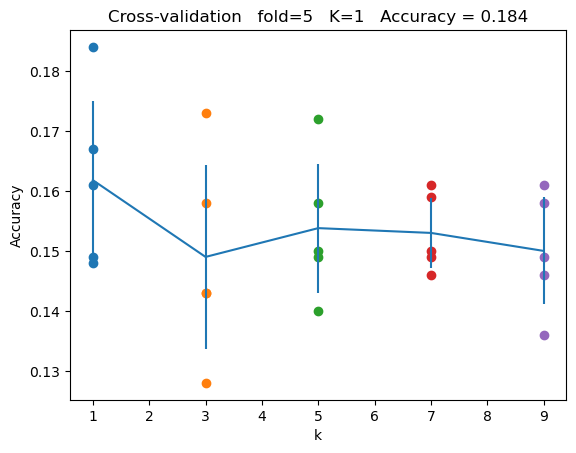

In [24]:
plot_Accuracies(5,k_values,k_values_error_l1)

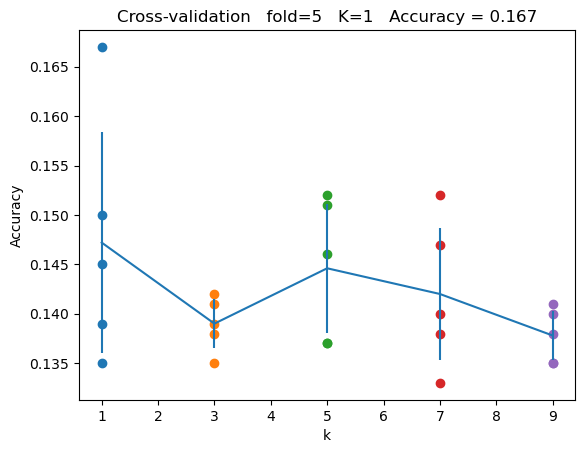

In [25]:
plot_Accuracies(5,k_values,k_values_error_l2)

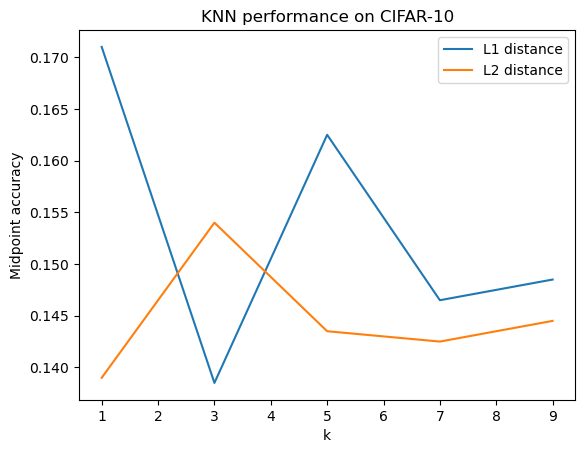

In [27]:
plt.plot(k_values, midpoint_l1_accuracies, label='L1 distance')
plt.plot(k_values, midpoint_l2_accuracies, label='L2 distance')
plt.xlabel('k')
plt.ylabel('Midpoint accuracy')
plt.title('KNN performance on CIFAR-10')
plt.legend()
plt.show()
